# <span style="color:purple">Cartopy 2: NYS Mesonet Data</span>

### In this notebook, we'll use Cartopy, Matplotlib, Datetime, and Pandas to visualize data from the <a href="http://www.nysmesonet.org/">New York State Mesonet</a>, headquartered right here at UAlbany.

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from datetime import datetime

### Create a regional map, centered over NYS, and add in some geographic features.
#### <span style="color: red"><b>Be patient</b></span>: this may take a minute or so to plot, depending on the resolution of the Natural Earth shapefile features you are adding! 

<img src = "../../common/mar07/NaturalEarthScales.png" width=800 height=600 />

<a img="images/NaturalEarthScales.png"></a>

## Create the figure
#### For a quick look, let's just choose the coarsest (110,000,000:1) Natural Earth shapefiles set.

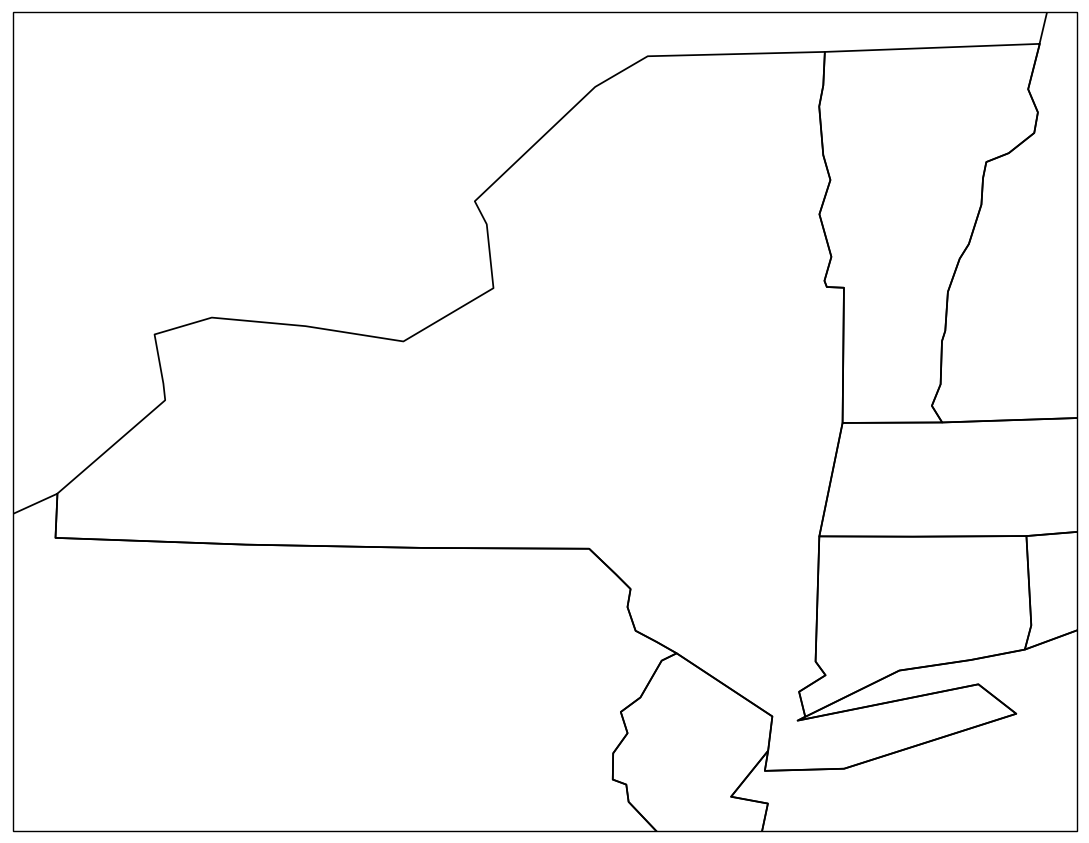

In [92]:
# Set the domain for defining the plot region.
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
#proj = ccrs.LambertConformal()
res = '110m' # Coarsest and quickest to display; other options are '10m' (slowest) and '50m'.

fig = plt.figure(figsize=(11,8.5),dpi=125)
ax = plt.subplot(1,1,1,projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature (cfeature.STATES.with_scale(res));

### Plot some data on the map. We'll use Pandas to read in the file containing the most recent NYS Mesonet obs.


In [93]:
df = pd.read_csv('http://www.atmos.albany.edu/products/nysm/nysm_latest.csv')

### View the first and last five lines of this `DataFrame`

In [94]:
df

,station,time,temp_2m [degC],temp_9m [degC],relative_humidity [percent],precip_incremental [mm],precip_local [mm],precip_max_intensity [mm/min],avg_wind_speed_prop [m/s],max_wind_speed_prop [m/s],...,soil_temp_05cm [degC],soil_temp_25cm [degC],soil_temp_50cm [degC],soil_moisture_05cm [m^3/m^3],soil_moisture_25cm [m^3/m^3],soil_moisture_50cm [m^3/m^3],lat,lon,elevation,name
0,ADDI,2023-03-07 21:00:00,-0.0,-0.2,53.2,0.0,2.23,0.0,6.3,11.4,...,1.5,2.0,2.8,0.59,0.44,0.43,42.040360,-77.237260,507.6140,Addison
1,ANDE,2023-03-07 21:00:00,-3.6,-3.8,71.4,0.0,0.00,0.0,3.0,7.2,...,1.7,2.3,2.9,0.29,0.19,0.18,42.182270,-74.801390,518.2820,Andes
2,BATA,2023-03-07 21:00:00,-0.4,-0.3,51.7,0.0,0.00,0.0,9.0,12.9,...,1.0,1.7,2.5,0.32,0.28,0.29,43.019940,-78.135660,276.1200,Batavia
3,BEAC,2023-03-07 21:00:00,4.3,3.7,42.8,0.0,0.00,0.0,6.2,11.0,...,5.3,4.0,4.1,0.38,0.41,0.39,41.528750,-73.945270,90.1598,Beacon
4,BELD,2023-03-07 21:00:00,-2.8,-2.8,64.8,0.0,0.00,0.0,5.1,10.4,...,1.2,1.6,2.2,0.52,0.48,0.41,42.223220,-75.668520,470.3700,Belden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,WFMB,2023-03-07 21:00:00,-8.3,-8.4,73.7,0.0,0.27,0.0,0.9,2.4,...,0.5,1.1,1.6,0.25,0.22,0.23,44.393236,-73.858829,614.5990,Whiteface Mountain Base
122,WGAT,2023-03-07 21:00:00,-4.8,-5.0,63.4,0.0,0.00,0.0,1.9,3.8,...,0.2,0.6,1.1,0.15,0.26,0.08,43.532408,-75.158597,442.9660,Woodgate
123,WHIT,2023-03-07 21:00:00,-1.9,-2.1,70.6,0.0,0.28,0.0,2.8,5.0,...,0.4,1.0,2.1,0.61,0.52,0.50,43.485073,-73.423071,36.5638,Whitehall
124,WOLC,2023-03-07 21:00:00,1.4,1.3,58.5,0.0,0.00,0.0,3.9,8.5,...,0.7,1.0,1.5,0.25,0.05,0.12,43.228680,-76.842610,121.2190,Wolcott


Examine the column names.

In [95]:
df.columns

Index(['station', 'time', 'temp_2m [degC]', 'temp_9m [degC]',
       'relative_humidity [percent]', 'precip_incremental [mm]',
       'precip_local [mm]', 'precip_max_intensity [mm/min]',
       'avg_wind_speed_prop [m/s]', 'max_wind_speed_prop [m/s]',
       'wind_speed_stddev_prop [m/s]', 'wind_direction_prop [degrees]',
       'wind_direction_stddev_prop [degrees]', 'avg_wind_speed_sonic [m/s]',
       'max_wind_speed_sonic [m/s]', 'wind_speed_stddev_sonic [m/s]',
       'wind_direction_sonic [degrees]',
       'wind_direction_stddev_sonic [degrees]', 'solar_insolation [W/m^2]',
       'station_pressure [mbar]', 'snow_depth [cm]', 'frozen_soil_05cm [bit]',
       'frozen_soil_25cm [bit]', 'frozen_soil_50cm [bit]',
       'soil_temp_05cm [degC]', 'soil_temp_25cm [degC]',
       'soil_temp_50cm [degC]', 'soil_moisture_05cm [m^3/m^3]',
       'soil_moisture_25cm [m^3/m^3]', 'soil_moisture_50cm [m^3/m^3]', 'lat',
       'lon', 'elevation', 'name'],
      dtype='object')

### Create objects pointing to some columns of interest. In Pandas, we can refer to columns by using a "." in addtion to "[]" in most circumstances, though not if a column name starts with a number, nor if there are spaces in the column name.

In [96]:
stid = df.station
lat = df.lat
lon = df.lon
tmp2 = df['temp_2m [degC]'] # Use brackets due to the presence of a space in the column name
tmp9 = df['temp_9m [degC]']
time = df.time

In [97]:
tmp2

0     -0.0
1     -3.6
2     -0.4
3      4.3
4     -2.8
      ... 
121   -8.3
122   -4.8
123   -1.9
124    1.4
125    2.0
Name: temp_2m [degC], Length: 126, dtype: float64

We will plot one of the variables on a map later on in this notebook. In case we want to go back later and pick a different variable to plot (e.g. 9 m temperature), let's define a generic object name. 

In [98]:
param = tmp2 # replace with tmp9, e.g., if you want to plot 9 m temperature

Let's look at the time object.

In [99]:
time

0      2023-03-07 21:00:00
1      2023-03-07 21:00:00
2      2023-03-07 21:00:00
3      2023-03-07 21:00:00
4      2023-03-07 21:00:00
              ...         
121    2023-03-07 21:00:00
122    2023-03-07 21:00:00
123    2023-03-07 21:00:00
124    2023-03-07 21:00:00
125    2023-03-07 21:00:00
Name: time, Length: 126, dtype: object

#### The times are the same for all stations, so let's just pull out one of them, and then create some formatted datetime strings out of it.

In [100]:
timeString = time[0]
timeString

'2023-03-07 21:00:00'

#### The `timeString` above could make for a perfectly fine part of an informative title for a map, but let's create a string of the form "Month Day, Year, HourMin UTC" (e.g., *Mar 30, 2021, 0120 UTC* )
First, make a `datetime` object from the string, using `strptime` with a format that matches that of the string.

In [101]:
timeObj = datetime.strptime(timeString,"%Y-%m-%d %H:%M:%S")
timeObj

datetime.datetime(2023, 3, 7, 21, 0)

Next, make a `string` object from the `datetime` object, using `strftime` with a format that matches what we want to use in the map's title.

In [102]:
titleString = datetime.strftime(timeObj,"%B %d %Y, %H%M UTC")

In [103]:
titleString

'March 07 2023, 2100 UTC'

### Create a scatterplot to show the locations of each NYS Mesonet site using Matplotlib's `scatter` method. This method accepts an entire array of lon-lat values.

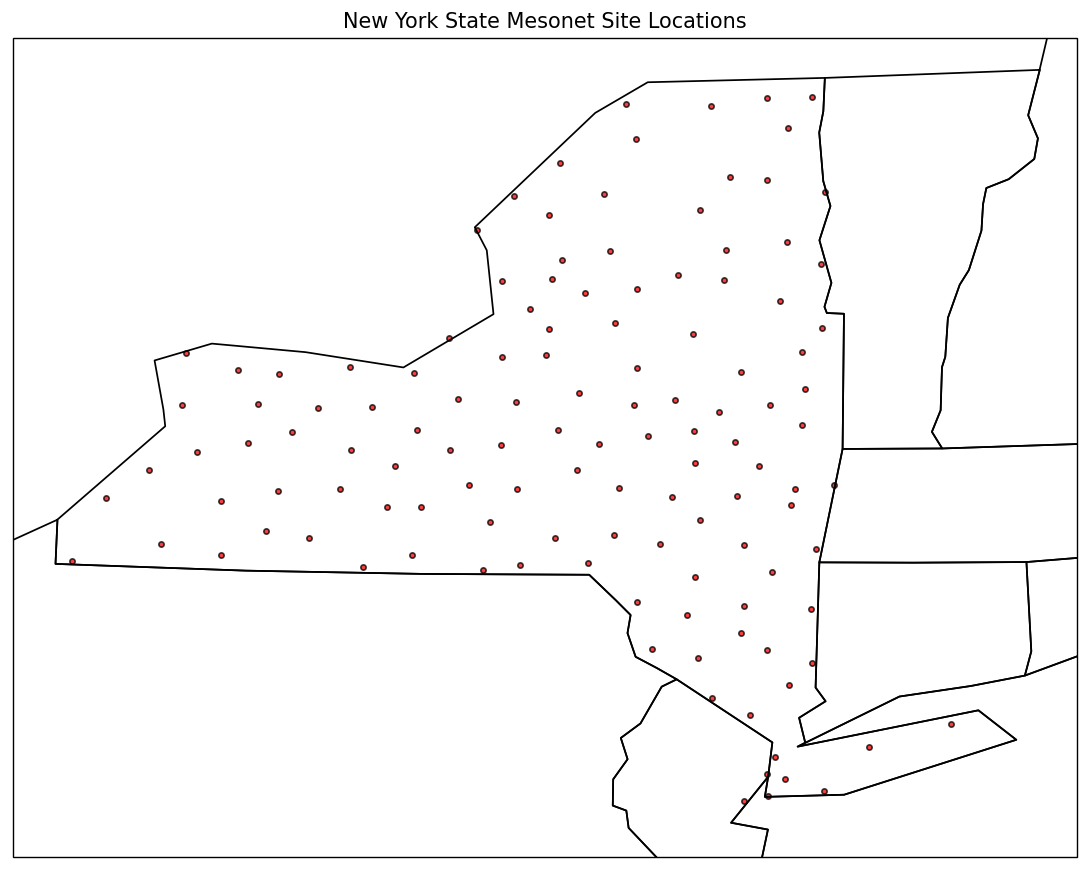

In [104]:
ax.set_title ('New York State Mesonet Site Locations')
ax.scatter(lon,lat,s=9,c='r',edgecolor='black',alpha=0.75,transform=ccrs.PlateCarree())
# Plot the figure, now with the sites plotted
fig

### <span style="color: red"> Did you notice the `transform` argument? </span> Since we are plotting on a Lambert Conformal-projected map, which uses a Cartesian x-y coordinate system where each point is equally separated in meters, we need to convert, or *transform*, the lat-lon coordinates into their equivalent coordinates in our chosen projection. We use the `transform` argument, and assign its value to the coordinate system that our lat-lon array is derived from.

### Next, plot the site IDs, using Matplotlib's `text` method. This method only accepts a single value for its x and y coordinates, so we need to loop over all the values in the arrays.

Recall that in a Python `list`, one can use the `enumerate` function to set a numerical value to be used as a counter. We can use the same technique on a Pandas `series` object:

In [105]:
for count, site in enumerate(stid):
    print (count, site)

0 ADDI
1 ANDE
2 BATA
3 BEAC
4 BELD
5 BELL
6 BELM
7 BERK
8 BING
9 BKLN
10 BRAN
11 BREW
12 BROC
13 BRON
14 BROO
15 BSPA
16 BUFF
17 BURD
18 BURT
19 CAMD
20 CAPE
21 CHAZ
22 CHES
23 CINC
24 CLAR
25 CLIF
26 CLYM
27 COBL
28 COHO
29 COLD
30 COPA
31 COPE
32 CROG
33 CSQR
34 DELE
35 DEPO
36 DOVE
37 DUAN
38 EAUR
39 EDIN
40 EDWA
41 ELDR
42 ELLE
43 ELMI
44 ESSX
45 FAYE
46 FRED
47 GABR
48 GFAL
49 GFLD
50 GROT
51 GROV
52 HAMM
53 HARP
54 HARR
55 HART
56 HERK
57 HFAL
58 ILAK
59 JOHN
60 JORD
61 KIND
62 LAUR
63 LOUI
64 MALO
65 MANH
66 MEDI
67 MEDU
68 MORR
69 NBRA
70 NEWC
71 NHUD
72 OLDF
73 OLEA
74 ONTA
75 OPPE
76 OSCE
77 OSWE
78 OTIS
79 OWEG
80 PENN
81 PHIL
82 PISE
83 POTS
84 QUEE
85 RAND
86 RAQU
87 REDF
88 REDH
89 ROXB
90 RUSH
91 SARA
92 SBRI
93 SCHA
94 SCHO
95 SCHU
96 SCIP
97 SHER
98 SOME
99 SOUT
100 SPRA
101 SPRI
102 STAT
103 STEP
104 STON
105 SUFF
106 TANN
107 TICO
108 TULL
109 TUPP
110 TYRO
111 VOOR
112 WALL
113 WALT
114 WANT
115 WARS
116 WARW
117 WATE
118 WBOU
119 WELL
120 WEST
121 WFMB
122 WGAT
123

We'll repeat the enumeration below; instead of printing out the counter value and its associated list element name, we'll pass them in directly to Matplotlib's `ax.text` function:

In [106]:
for count, site in enumerate(stid):
    ax.text(lon[count],lat[count],site,horizontalalignment='right',transform=ccrs.PlateCarree(),fontsize=7)

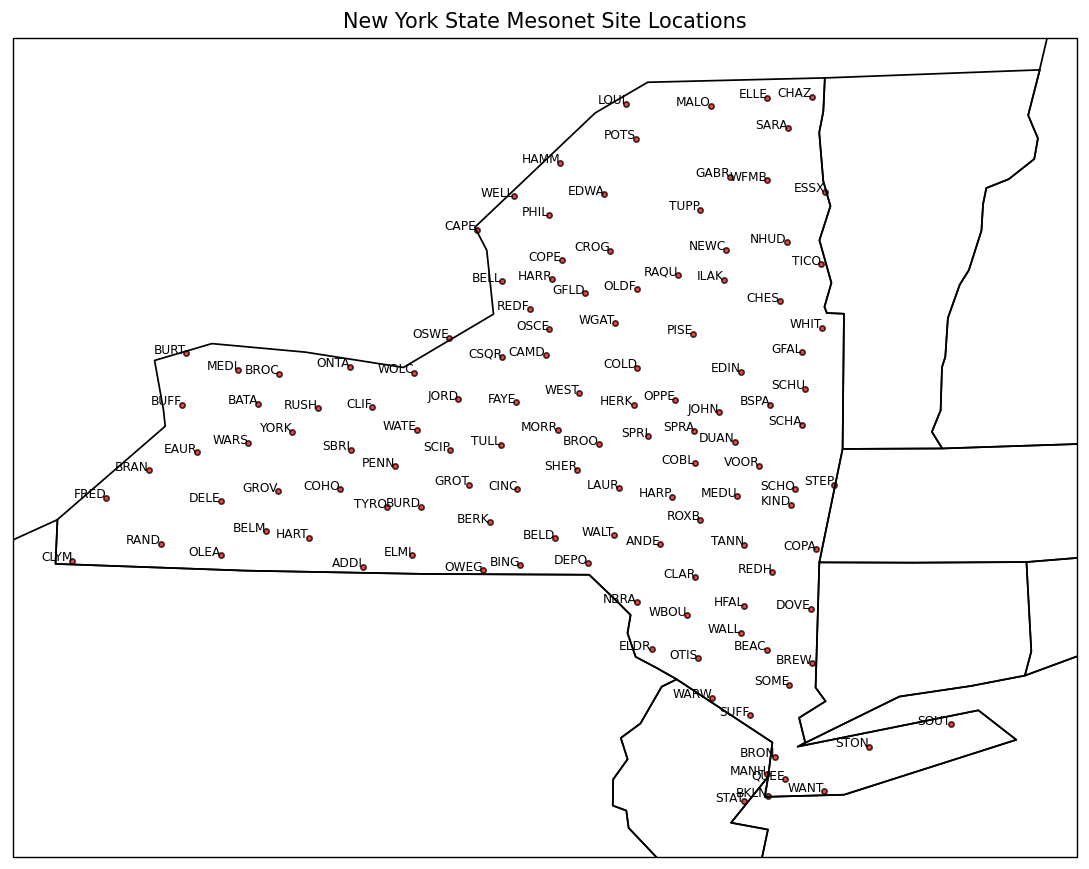

In [107]:
fig

Now, let's attempt to plot the site locations again, but this time we'll **omit** the `transform` argument in `ax.scatter` and `ax.text`. 

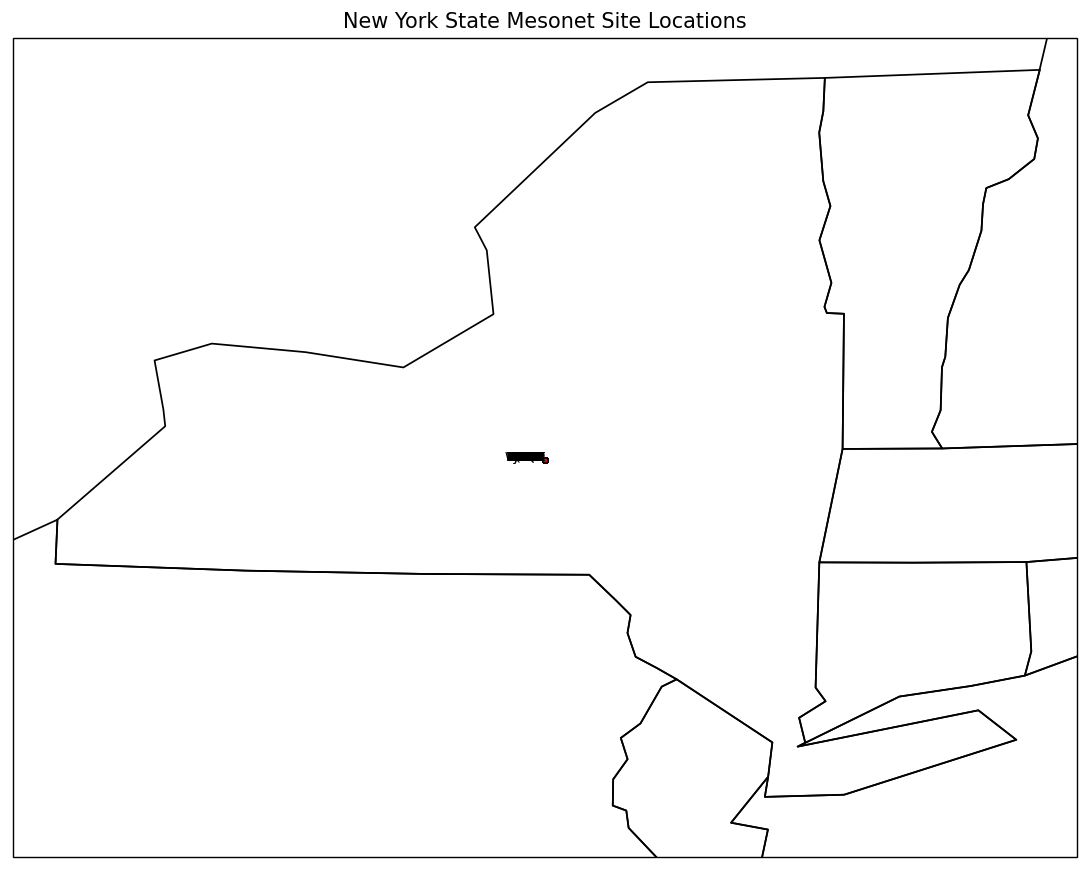

In [108]:
fig = plt.figure(figsize=(11,8.5),dpi=125)
ax = plt.subplot(1,1,1,projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature (cfeature.STATES.with_scale(res))
ax.set_title ('New York State Mesonet Site Locations')
ax.scatter(lon,lat,s=9,c='r',edgecolor='black',alpha=0.75) 
for count, site in enumerate(stid):
    ax.text(lon[count],lat[count],site,horizontalalignment='right',fontsize=7) 


### What do you think happened here?

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Exercise</p>
    Create a new figure which plots the current 2m temperature at the NYSM sites. Include the current date/time to the title.
</div>

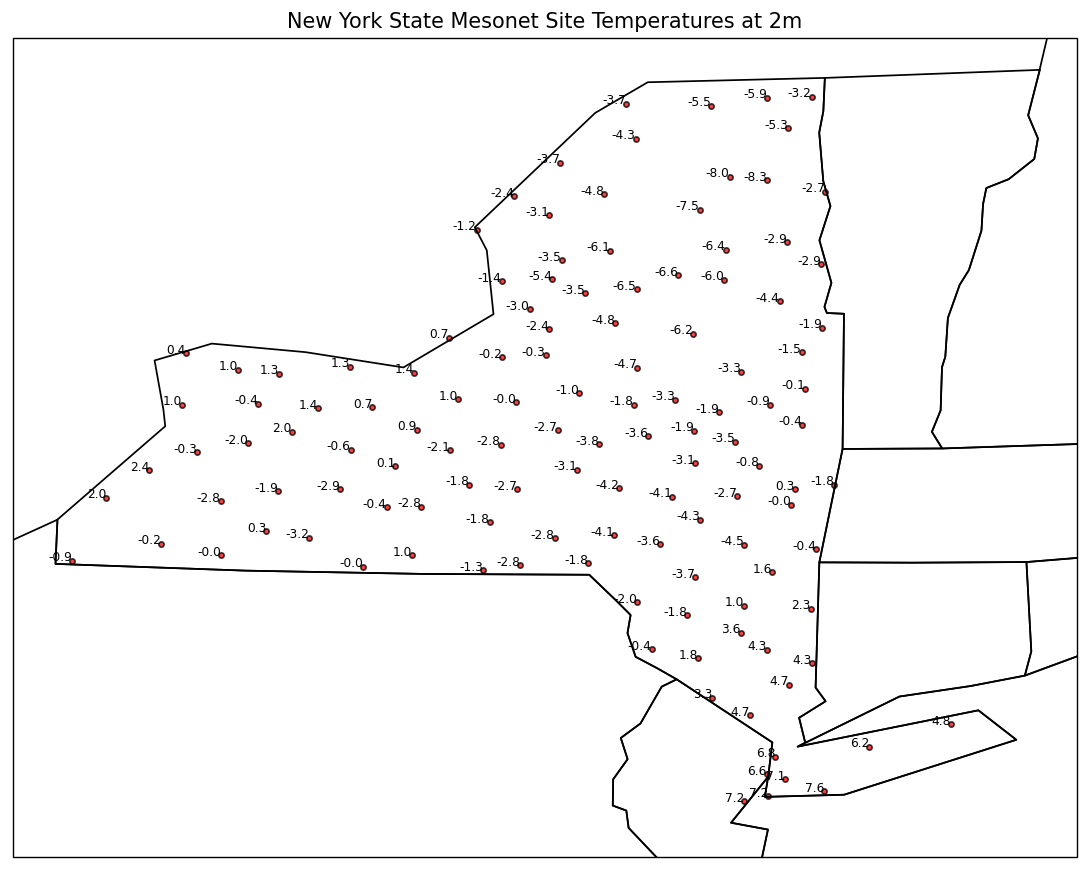

In [109]:
fig = plt.figure(figsize=(11,8.5),dpi=125)
ax = plt.subplot(1,1,1,projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature (cfeature.STATES.with_scale(res))
ax.set_title ('New York State Mesonet Site Temperatures at 2m')
ax.scatter(lon,lat,s=9,c='r',edgecolor='black',alpha=0.75,transform=ccrs.PlateCarree()) 
for count,temp in enumerate(tmp2):
    ax.text(lon[count],lat[count],temp,horizontalalignment='right',transform=ccrs.PlateCarree(),fontsize=7)

### We could plot additional variables, and in so doing create a standard surface station plot, but we would find it challenging to align all the variables around the points corresponding to the NYS Mesonet sites. Fortunately, Metpy's `StationPlot` method takes care of this, and we will be using it in upcoming notebooks!

#### Sneak preview: [Latest NYSM Surface Map](http://www.atmos.albany.edu/facstaff/ktyle/nysm/sfcmap.png)